In [1]:
import os
import sys
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon

In [2]:
ROOT_DIR = os.path.abspath(os.getcwd())

In [3]:
# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

In [4]:
import maize

In [5]:
%matplotlib inline

In [6]:
config = maize.MaizeConfig()
MAIZE_DIR = os.path.join(ROOT_DIR, "PlantVillage_Maize - coba 20231009")

In [7]:
# Load dataset
# Get the dataset from the releases page
# https://github.com/matterport/Mask_RCNN/releases
dataset = maize.MaizeDiseaseDataset()
dataset.load_maize_disease(MAIZE_DIR, "train")

# Must call before using the dataset
dataset.prepare()

print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

[{'filename': 'Corn_Blight (1).jpeg', 'size': 493607, 'regions': [{'shape_attributes': {'name': 'polygon', 'all_points_x': [1, 95, 151, 246, 325, 388, 446, 486, 595, 656, 684, 713, 792, 842, 860, 867, 907, 905, 928, 989, 952, 949, 886, 891, 798, 839, 866, 902, 865, 851, 760, 735, 561, 502, 419, 396, 354, 272, 252, 135, 131, 100, 0], 'all_points_y': [174, 165, 162, 165, 159, 154, 147, 135, 124, 113, 115, 112, 133, 138, 151, 161, 162, 168, 166, 193, 205, 196, 195, 205, 205, 218, 227, 226, 234, 229, 248, 242, 282, 248, 279, 264, 284, 287, 287, 256, 245, 220, 201]}, 'region_attributes': {'disease': 'blight'}}, {'shape_attributes': {'name': 'polygon', 'all_points_x': [2, 13, 36, 181, 233, 258, 326, 372, 465, 515, 441, 374, 378, 431, 194, 36, 7], 'all_points_y': [124, 118, 116, 80, 71, 75, 84, 98, 109, 125, 146, 144, 135, 127, 93, 129, 135]}, 'region_attributes': {'disease': 'blight'}}, {'shape_attributes': {'name': 'polygon', 'all_points_x': [239, 352, 386, 441, 446, 515, 678, 756, 789, 815

{'filename': 'Corn_Blight (1142).jpg', 'size': 110974, 'regions': [{'shape_attributes': {'name': 'polygon', 'all_points_x': [3, 149, 253, 308, 464, 501, 678, 858, 871, 890, 965, 1038, 1067, 1153, 1200, 1284, 1370, 1461, 1519, 1521, 1508, 1427, 1380, 1406, 1352, 1284, 1247, 1216, 1195, 1192, 1114, 1065, 1015, 1020, 1038, 1041, 989, 926, 890, 822, 780, 754, 697, 634, 618, 571, 540, 483, 394, 384, 373, 391, 261, 117, 97, 21, 5], 'all_points_y': [522, 543, 558, 574, 595, 590, 611, 644, 634, 611, 600, 600, 611, 616, 616, 626, 639, 647, 658, 681, 699, 707, 702, 736, 757, 757, 757, 767, 780, 788, 778, 783, 793, 762, 754, 738, 741, 741, 736, 736, 725, 702, 694, 673, 673, 663, 642, 642, 637, 637, 621, 611, 597, 584, 584, 584, 574]}, 'region_attributes': {'disease': 'blight'}}, {'shape_attributes': {'name': 'polygon', 'all_points_x': [157, 217, 347, 446, 493, 530, 574, 556, 509, 436, 357, 295, 279, 264, 274, 313, 295, 196, 164], 'all_points_y': [678, 663, 665, 663, 676, 718, 757, 770, 759, 767, 

{'filename': 'Corn_Common_Rust (18).jpg', 'size': 191382, 'regions': [{'shape_attributes': {'name': 'polygon', 'all_points_x': [220, 220, 228, 264, 281, 281, 315, 342, 348, 334, 342, 365, 412, 415, 392, 342, 312, 303, 303, 312, 337, 331, 348, 354, 381, 406, 434, 454, 448, 401, 379, 387, 415, 443, 426, 431, 426, 426, 415, 362, 278, 223, 212, 184, 175, 159, 114, 125, 142, 125, 89, 109, 111, 106, 67, 109, 134, 153, 173, 203], 'all_points_y': [28, 78, 117, 131, 109, 61, 36, 39, 67, 106, 120, 120, 122, 156, 184, 186, 198, 231, 278, 331, 373, 423, 534, 571, 585, 557, 540, 540, 612, 618, 674, 713, 735, 732, 774, 810, 880, 974, 1002, 1027, 1027, 1008, 944, 941, 980, 1016, 996, 971, 935, 902, 894, 713, 612, 532, 526, 354, 256, 167, 106, 33]}, 'region_attributes': {'disease': 'common_rust'}}, {'shape_attributes': {'name': 'polygon', 'all_points_x': [465, 493, 509, 526, 579, 640, 649, 615, 537, 521], 'all_points_y': [189, 281, 323, 367, 359, 345, 323, 270, 217, 184]}, 'region_attributes': {'disea

{'filename': 'Corn_Gray_Spot (15).jpg', 'size': 40107, 'regions': [{'shape_attributes': {'name': 'polygon', 'all_points_x': [97, 87, 95, 113, 131, 142, 145, 160, 172, 169], 'all_points_y': [57, 74, 85, 85, 87, 79, 70, 68, 65, 51]}, 'region_attributes': {'disease': 'gray_leaf_spot'}}, {'shape_attributes': {'name': 'polygon', 'all_points_x': [167, 175, 187, 217, 238, 251, 242, 191, 169], 'all_points_y': [178, 185, 182, 179, 170, 163, 153, 161, 167]}, 'region_attributes': {'disease': 'gray_leaf_spot'}}, {'shape_attributes': {'name': 'polygon', 'all_points_x': [250, 239, 253, 271, 283, 313, 313, 301, 273, 257], 'all_points_y': [115, 123, 130, 132, 128, 129, 117, 117, 115, 116]}, 'region_attributes': {'disease': 'gray_leaf_spot'}}], 'file_attributes': {}}



{'filename': 'Corn_Gray_Spot (16).jpg', 'size': 76096, 'regions': [{'shape_attributes': {'name': 'polygon', 'all_points_x': [30, 57, 76, 94, 115, 125, 145, 158, 155, 147, 150, 171, 181, 179, 172, 157, 132, 125, 131, 130, 124, 115, 104, 

{'filename': 'Corn_Gray_Spot (37).jpg', 'size': 50717, 'regions': [{'shape_attributes': {'name': 'polygon', 'all_points_x': [0, 0, 13, 39, 39, 42, 31, 5, 1, 2, 9, 29, 39, 65, 87, 103, 141, 189, 214, 218, 235, 254, 258, 265, 273, 299, 333, 341, 346, 359, 389, 419, 447, 457, 466, 465, 449, 407, 350, 339, 313, 290, 196, 169, 129, 107, 81, 63, 58, 62, 77, 94, 94, 45], 'all_points_y': [88, 113, 114, 115, 126, 136, 141, 145, 145, 221, 225, 225, 235, 245, 249, 249, 248, 248, 253, 267, 269, 268, 274, 290, 302, 311, 308, 296, 279, 275, 275, 276, 276, 275, 267, 251, 243, 242, 261, 238, 228, 213, 219, 197, 194, 186, 179, 165, 149, 137, 115, 107, 85, 84]}, 'region_attributes': {'disease': 'gray_leaf_spot'}}, {'shape_attributes': {'name': 'polygon', 'all_points_x': [228, 185, 155, 129, 132, 155, 169, 185, 224, 251, 277, 301, 318, 345, 361, 373, 397, 417, 449, 471, 482, 485, 487, 473, 455, 414, 401, 398, 429, 445, 444, 465, 479, 491, 477, 373, 341, 304, 275, 251, 195, 186, 182, 195, 199, 195, 187, 1

{'filename': 'Corn_Common_Rust (31).jpg', 'size': 1342670, 'regions': [{'shape_attributes': {'name': 'polygon', 'all_points_x': [3, 57, 244, 338, 474, 558, 796, 989, 1110, 1243, 1360, 1451, 1484, 1499, 1493, 763, 745, 842, 896, 757, 697, 643, 573, 522, 483, 419, 353, 323, 271, 232, 196, 133, 66, 15, 3], 'all_points_y': [314, 314, 332, 332, 320, 332, 359, 368, 386, 392, 419, 431, 519, 1032, 1122, 1122, 1041, 971, 938, 938, 917, 923, 944, 962, 980, 995, 1011, 1017, 1020, 1011, 1008, 965, 947, 914, 902]}, 'region_attributes': {'disease': 'common_rust'}}], 'file_attributes': {}}



{'filename': 'Corn_Common_Rust (32).jpg', 'size': 246965, 'regions': [{'shape_attributes': {'name': 'polygon', 'all_points_x': [29, 95, 164, 255, 419, 517, 556, 608, 668, 747, 821, 867, 927, 948, 956, 948, 863, 751, 680, 626, 570, 519, 419, 353, 297, 292, 234, 187, 195, 220, 241, 241, 6, 2], 'all_points_y': [324, 282, 264, 214, 154, 135, 106, 89, 71, 70, 31, 15, 12, 27, 270, 454, 465, 471, 487, 496, 529, 544, 56

{'filename': 'Corn_Blight (28).jpg', 'size': 12708, 'regions': [{'shape_attributes': {'name': 'polygon', 'all_points_x': [2, 17, 31, 39, 53, 64, 73, 83, 76, 50, 40, 32, 24, 11, 2], 'all_points_y': [84, 84, 79, 72, 63, 61, 58, 60, 66, 76, 78, 85, 88, 91, 90]}, 'region_attributes': {'disease': 'blight'}}, {'shape_attributes': {'name': 'polygon', 'all_points_x': [73, 87, 103, 111, 128, 138, 150, 160, 168, 141, 123, 104, 84, 75], 'all_points_y': [42, 38, 34, 33, 31, 33, 35, 41, 43, 48, 49, 49, 48, 45]}, 'region_attributes': {'disease': 'blight'}}, {'shape_attributes': {'name': 'polygon', 'all_points_x': [51, 74, 86, 97, 112, 130, 143, 159, 170, 177, 188, 197, 189, 156, 148, 133, 117, 99, 89, 79, 69], 'all_points_y': [79, 74, 67, 65, 64, 59, 58, 56, 56, 56, 58, 59, 66, 69, 70, 72, 74, 74, 79, 81, 81]}, 'region_attributes': {'disease': 'blight'}}, {'shape_attributes': {'name': 'polygon', 'all_points_x': [17, 49, 59, 71, 88, 99, 103, 103, 114, 124, 134, 148, 160, 175, 182, 190, 200, 181, 169,

[[[False]
  [False]
  [False]
  ...
  [False]
  [False]
  [False]]

 [[False]
  [False]
  [False]
  ...
  [False]
  [False]
  [False]]

 [[False]
  [False]
  [False]
  ...
  [False]
  [False]
  [False]]

 ...

 [[False]
  [False]
  [False]
  ...
  [False]
  [False]
  [False]]

 [[False]
  [False]
  [False]
  ...
  [False]
  [False]
  [False]]

 [[False]
  [False]
  [False]
  ...
  [False]
  [False]
  [False]]]
[1]


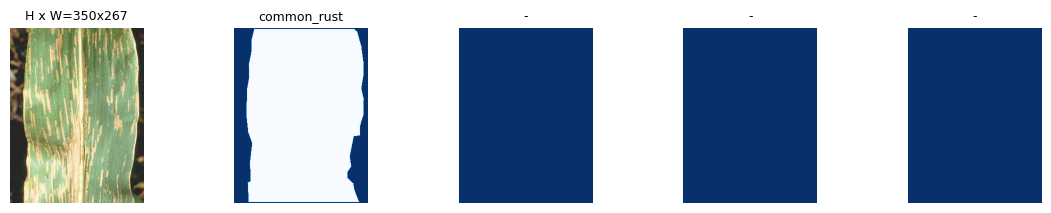

[[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 ...

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False Fal

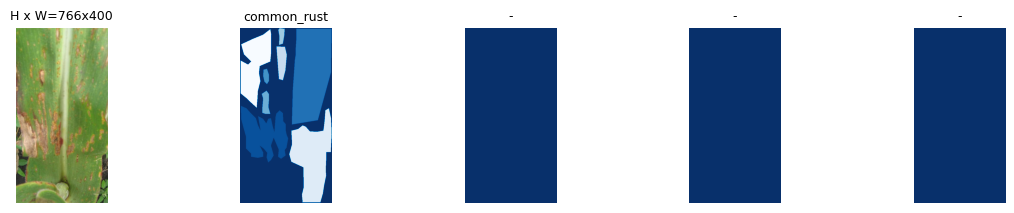

[[[False False]
  [False False]
  [False False]
  ...
  [False  True]
  [False  True]
  [False  True]]

 [[False False]
  [False False]
  [False False]
  ...
  [False  True]
  [False  True]
  [False  True]]

 [[False False]
  [False False]
  [False False]
  ...
  [False  True]
  [False  True]
  [False  True]]

 ...

 [[False False]
  [False False]
  [False False]
  ...
  [False False]
  [False False]
  [False False]]

 [[False False]
  [False False]
  [False False]
  ...
  [False False]
  [False False]
  [False False]]

 [[False False]
  [False False]
  [False False]
  ...
  [False False]
  [False False]
  [False False]]]
[1 1]


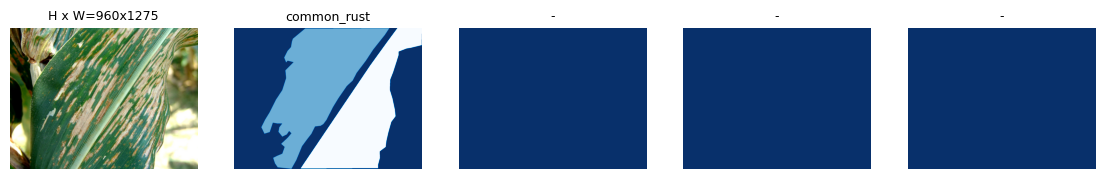

[[[False False False False]
  [False False False False]
  [False False False False]
  ...
  [False False False False]
  [False False False False]
  [False False False False]]

 [[False False False False]
  [False False False False]
  [False False False False]
  ...
  [False False False False]
  [False False False False]
  [False False False False]]

 [[False False False False]
  [False False False False]
  [False False False False]
  ...
  [False False False False]
  [False False False False]
  [False False False False]]

 ...

 [[False False False False]
  [False False False False]
  [False False False False]
  ...
  [False False False False]
  [False False False False]
  [False False False False]]

 [[False False False False]
  [False False False False]
  [False False False False]
  ...
  [False False False False]
  [False False False False]
  [False False False False]]

 [[False False False False]
  [False False False False]
  [False False False False]
  ...
  [False False False Fal

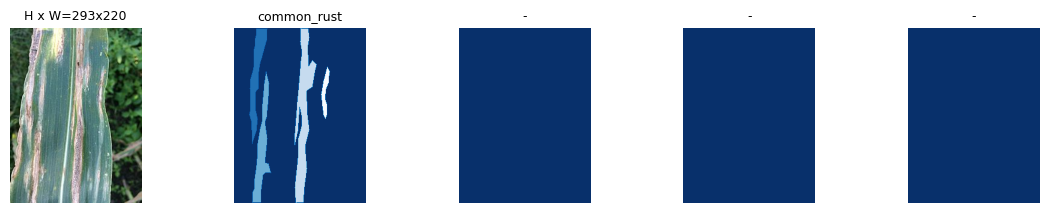

In [15]:
# Load and display random samples
image_ids = np.random.choice(dataset.image_ids, 4)
for image_id in image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
#     print(image)
    print(mask)
    print(class_ids)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

In [ ]:
# Load random image and mask.
image_id = random.choice(dataset.image_ids)
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

In [13]:
print(dir(dataset))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_image_ids', 'add_class', 'add_image', 'class_from_source_map', 'class_ids', 'class_info', 'class_names', 'get_source_class_id', 'image_from_source_map', 'image_ids', 'image_info', 'image_reference', 'load_image', 'load_maize_disease', 'load_mask', 'map_source_class_id', 'num_classes', 'num_images', 'prepare', 'source_class_ids', 'source_image_link', 'sources']


In [ ]:
# Load random image and mask.
image_id = np.random.choice(dataset.image_ids, 1)[0]
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
original_shape = image.shape
# Resize
image, window, scale, padding, _ = utils.resize_image(
    image, 
    min_dim=config.IMAGE_MIN_DIM, 
    max_dim=config.IMAGE_MAX_DIM,
    mode=config.IMAGE_RESIZE_MODE)
mask = utils.resize_mask(mask, scale, padding)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id: ", image_id, dataset.image_reference(image_id))
print("Original shape: ", original_shape)
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

In [ ]:
image_id = np.random.choice(dataset.image_ids, 1)[0]
image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
    dataset, config, image_id)

log("image", image)
log("image_meta", image_meta)
log("class_ids", class_ids)
log("bbox", bbox)
log("mask", mask)

display_images([image]+[mask[:,:,i] for i in range(min(mask.shape[-1], 7))])

In [ ]:
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

In [ ]:
# Add augmentation and mask resizing.
image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
    dataset, config, image_id, augment=True, use_mini_mask=True)
log("mask", mask)
display_images([image]+[mask[:,:,i] for i in range(min(mask.shape[-1], 7))])

In [ ]:
mask = utils.expand_mask(bbox, mask, image.shape)
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

In [ ]:
# Generate Anchors
backbone_shapes = modellib.compute_backbone_shapes(config, config.IMAGE_SHAPE)
anchors = utils.generate_pyramid_anchors(config.RPN_ANCHOR_SCALES, 
                                          config.RPN_ANCHOR_RATIOS,
                                          backbone_shapes,
                                          config.BACKBONE_STRIDES, 
                                          config.RPN_ANCHOR_STRIDE)

# Print summary of anchors
num_levels = len(backbone_shapes)
anchors_per_cell = len(config.RPN_ANCHOR_RATIOS)
print("Count: ", anchors.shape[0])
print("Scales: ", config.RPN_ANCHOR_SCALES)
print("ratios: ", config.RPN_ANCHOR_RATIOS)
print("Anchors per Cell: ", anchors_per_cell)
print("Levels: ", num_levels)
anchors_per_level = []
for l in range(num_levels):
    num_cells = backbone_shapes[l][0] * backbone_shapes[l][1]
    anchors_per_level.append(anchors_per_cell * num_cells // config.RPN_ANCHOR_STRIDE**2)
    print("Anchors in Level {}: {}".format(l, anchors_per_level[l]))

In [ ]:
## Visualize anchors of one cell at the center of the feature map of a specific level

# Load and draw random image
image_id = np.random.choice(dataset.image_ids, 1)[0]
image, image_meta, _, _, _ = modellib.load_image_gt(dataset, config, image_id)
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.imshow(image)
levels = len(backbone_shapes)

for level in range(levels):
    colors = visualize.random_colors(levels)
    # Compute the index of the anchors at the center of the image
    level_start = sum(anchors_per_level[:level]) # sum of anchors of previous levels
    level_anchors = anchors[level_start:level_start+anchors_per_level[level]]
    print("Level {}. Anchors: {:6}  Feature map Shape: {}".format(level, level_anchors.shape[0], 
                                                                  backbone_shapes[level]))
    center_cell = backbone_shapes[level] // 2
    center_cell_index = (center_cell[0] * backbone_shapes[level][1] + center_cell[1])
    level_center = center_cell_index * anchors_per_cell 
    center_anchor = anchors_per_cell * (
        (center_cell[0] * backbone_shapes[level][1] / config.RPN_ANCHOR_STRIDE**2) \
        + center_cell[1] / config.RPN_ANCHOR_STRIDE)
    level_center = int(center_anchor)

    # Draw anchors. Brightness show the order in the array, dark to bright.
    for i, rect in enumerate(level_anchors[level_center:level_center+anchors_per_cell]):
        y1, x1, y2, x2 = rect
        p = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=2, facecolor='none',
                              edgecolor=(i+1)*np.array(colors[level]) / anchors_per_cell)
        ax.add_patch(p)


In [ ]:
# Create data generator
random_rois = 2000
g = modellib.data_generator(
    dataset, config, shuffle=True, random_rois=random_rois, 
    batch_size=4,
    detection_targets=True)

In [ ]:
# Uncomment to run the generator through a lot of images
# to catch rare errors
# for i in range(1000):
#     print(i)
#     _, _ = next(g)

In [ ]:
# Get Next Image
if random_rois:
    [normalized_images, image_meta, rpn_match, rpn_bbox, gt_class_ids, gt_boxes, gt_masks, rpn_rois, rois], \
    [mrcnn_class_ids, mrcnn_bbox, mrcnn_mask] = next(g)
    
    log("rois", rois)
    log("mrcnn_class_ids", mrcnn_class_ids)
    log("mrcnn_bbox", mrcnn_bbox)
    log("mrcnn_mask", mrcnn_mask)
else:
    [normalized_images, image_meta, rpn_match, rpn_bbox, gt_boxes, gt_masks], _ = next(g)
    
log("gt_class_ids", gt_class_ids)
log("gt_boxes", gt_boxes)
log("gt_masks", gt_masks)
log("rpn_match", rpn_match, )
log("rpn_bbox", rpn_bbox)
image_id = modellib.parse_image_meta(image_meta)["image_id"][0]
print("image_id: ", image_id, dataset.image_reference(image_id))

# Remove the last dim in mrcnn_class_ids. It's only added
# to satisfy Keras restriction on target shape.
mrcnn_class_ids = mrcnn_class_ids[:,:,0]

In [ ]:
b = 0

# Restore original image (reverse normalization)
sample_image = modellib.unmold_image(normalized_images[b], config)

# Compute anchor shifts.
indices = np.where(rpn_match[b] == 1)[0]
refined_anchors = utils.apply_box_deltas(anchors[indices], rpn_bbox[b, :len(indices)] * config.RPN_BBOX_STD_DEV)
log("anchors", anchors)
log("refined_anchors", refined_anchors)

# Get list of positive anchors
positive_anchor_ids = np.where(rpn_match[b] == 1)[0]
print("Positive anchors: {}".format(len(positive_anchor_ids)))
negative_anchor_ids = np.where(rpn_match[b] == -1)[0]
print("Negative anchors: {}".format(len(negative_anchor_ids)))
neutral_anchor_ids = np.where(rpn_match[b] == 0)[0]
print("Neutral anchors: {}".format(len(neutral_anchor_ids)))

# ROI breakdown by class
for c, n in zip(dataset.class_names, np.bincount(mrcnn_class_ids[b].flatten())):
    if n:
        print("{:23}: {}".format(c[:20], n))

# Show positive anchors
fig, ax = plt.subplots(1, figsize=(16, 16))
visualize.draw_boxes(sample_image, boxes=anchors[positive_anchor_ids], 
                     refined_boxes=refined_anchors, ax=ax)

In [ ]:
# Show negative anchors
visualize.draw_boxes(sample_image, boxes=anchors[negative_anchor_ids])

In [ ]:
# Show neutral anchors. They don't contribute to training.
visualize.draw_boxes(sample_image, boxes=anchors[np.random.choice(neutral_anchor_ids, 100)])

In [ ]:
if random_rois:
    # Class aware bboxes
    bbox_specific = mrcnn_bbox[b, np.arange(mrcnn_bbox.shape[1]), mrcnn_class_ids[b], :]

    # Refined ROIs
    refined_rois = utils.apply_box_deltas(rois[b].astype(np.float32), bbox_specific[:,:4] * config.BBOX_STD_DEV)

    # Class aware masks
    mask_specific = mrcnn_mask[b, np.arange(mrcnn_mask.shape[1]), :, :, mrcnn_class_ids[b]]

    visualize.draw_rois(sample_image, rois[b], refined_rois, mask_specific, mrcnn_class_ids[b], dataset.class_names)
    
    # Any repeated ROIs?
    rows = np.ascontiguousarray(rois[b]).view(np.dtype((np.void, rois.dtype.itemsize * rois.shape[-1])))
    _, idx = np.unique(rows, return_index=True)
    print("Unique ROIs: {} out of {}".format(len(idx), rois.shape[1]))

In [ ]:
if random_rois:
    # Dispalay ROIs and corresponding masks and bounding boxes
    ids = random.sample(range(rois.shape[1]), 8)

    images = []
    titles = []
    for i in ids:
        image = visualize.draw_box(sample_image.copy(), rois[b,i,:4].astype(np.int32), [255, 0, 0])
        image = visualize.draw_box(image, refined_rois[i].astype(np.int64), [0, 255, 0])
        images.append(image)
        titles.append("ROI {}".format(i))
        images.append(mask_specific[i] * 255)
        titles.append(dataset.class_names[mrcnn_class_ids[b,i]][:20])

    display_images(images, titles, cols=4, cmap="Blues", interpolation="none")

In [ ]:
# Check ratio of positive ROIs in a set of images.
if random_rois:
    limit = 10
    temp_g = modellib.data_generator(
        dataset, config, shuffle=True, random_rois=10000, 
        batch_size=1, detection_targets=True)
    total = 0
    for i in range(limit):
        _, [ids, _, _] = next(temp_g)
        positive_rois = np.sum(ids[0] > 0)
        total += positive_rois
        print("{:5} {:5.2f}".format(positive_rois, positive_rois/ids.shape[1]))
    print("Average percent: {:.2f}".format(total/(limit*ids.shape[1])))

In [ ]:
def train(model):
    """Train the model."""
    # Training dataset.
    dataset_train = balloon.BalloonDataset()
    dataset_train.load_balloon(BALLOON_DIR, "train")
    dataset_train.prepare()

    # Validation dataset
    dataset_val = balloon.BalloonDataset()
    dataset_val.load_balloon(BALLOON_DIR, "val")
    dataset_val.prepare()

    # *** This training schedule is an example. Update to your needs ***
    # Since we're using a very small dataset, and starting from
    # COCO trained weights, we don't need to train too long. Also,
    # no need to train all layers, just the heads should do it.
    print("Training network heads")
    model.train(dataset_train, dataset_val,
                learning_rate=config.LEARNING_RATE,
                epochs=15,
                layers='heads')  
    
model.save('64x3-CNN.h5')

checkpoint = ModelCheckpoint("models/{}.model".format(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')) #


In [ ]:
if __name__ == '__main__':
    print('Train')
    
    config = balloon.BalloonConfig()
    
    model = modellib.MaskRCNN(mode="training", config=config,
                          model_dir=ROOT_DIR)
    
    COCO_WEIGHTS_PATH = 'mask_rcnn_coco.h5'
    weights_path = COCO_WEIGHTS_PATH
    
    # Find last trained weights
    # weights_path = model.find_last()[1]
    
    
    model.load_weights(COCO_WEIGHTS_PATH, by_name=True, exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"])
    
    train(model)